In [110]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib notebook 

In [134]:
data = pd.read_csv('/Users/mac/Desktop/Supermarket Work/Mall_Customers.csv', header='infer',)
data.head(6)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [135]:
data.isnull().sum()  # no NA values 

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [136]:
#data.CustomerID.nunique(dropna=True) We're going to rerun with gender and customer id column 

In [117]:
data.shape

(200, 4)

In [137]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [138]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [139]:
#dropping the genre columns it has only 2 unique values 
#data.drop('Genre', axis=1, inplace=True) #rather than dropping we impute
dummy = pd.get_dummies(data['Genre'])
data = pd.concat([data,dummy], axis=1)
data.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1


In [140]:
data.drop('Genre', inplace=True, axis=1)

In [141]:
data.head(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1


In [142]:
#Standardization
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
std_data=standardizer.fit_transform(data)

stdata = pd.DataFrame(std_data, columns =data.columns)

In [143]:
stdata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-6.661338e-18,-9.603429e-17,-6.128431e-16,-1.121325e-16,-8.437695e-17,1.554312e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412e+00,-1.496335e+00,-1.738999e+00,-1.910021e+00,-1.128152e+00,-8.864053e-01
25%,-8.617060e-01,-7.248436e-01,-7.275093e-01,-5.997931e-01,-1.128152e+00,-8.864053e-01
50%,0.000000e+00,-2.045351e-01,3.587926e-02,-7.764312e-03,8.864053e-01,-8.864053e-01
75%,8.617060e-01,7.284319e-01,6.656748e-01,8.851316e-01,8.864053e-01,1.128152e+00
max,1.723412e+00,2.235532e+00,2.917671e+00,1.894492e+00,8.864053e-01,1.128152e+00


In [144]:
from sklearn.cluster import KMeans

In [153]:
##First using elbow method to check accurate number of clusters
wss = {}
for k in range(1,21):
    kmeans_loop = KMeans(n_clusters=k,n_init=20, max_iter=200,random_state=1234,verbose=0).fit(stdata)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ #sum of squared distance

In [154]:
list(wss.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [155]:
wss.values()

dict_values([1200.0, 797.2883426603587, 638.6589248711804, 510.57217511559406, 435.44469860374465, 368.9735492181911, 304.31423972380156, 254.41521729352556, 222.6225050023683, 191.37365582186786, 170.1866701513118, 152.23132550285453, 140.51556647543623, 133.34586947506807, 124.36737612494179, 118.07205526230456, 111.97623325989551, 104.37302587367108, 99.25665449015307, 92.52523029279693])

<IPython.core.display.Javascript object>


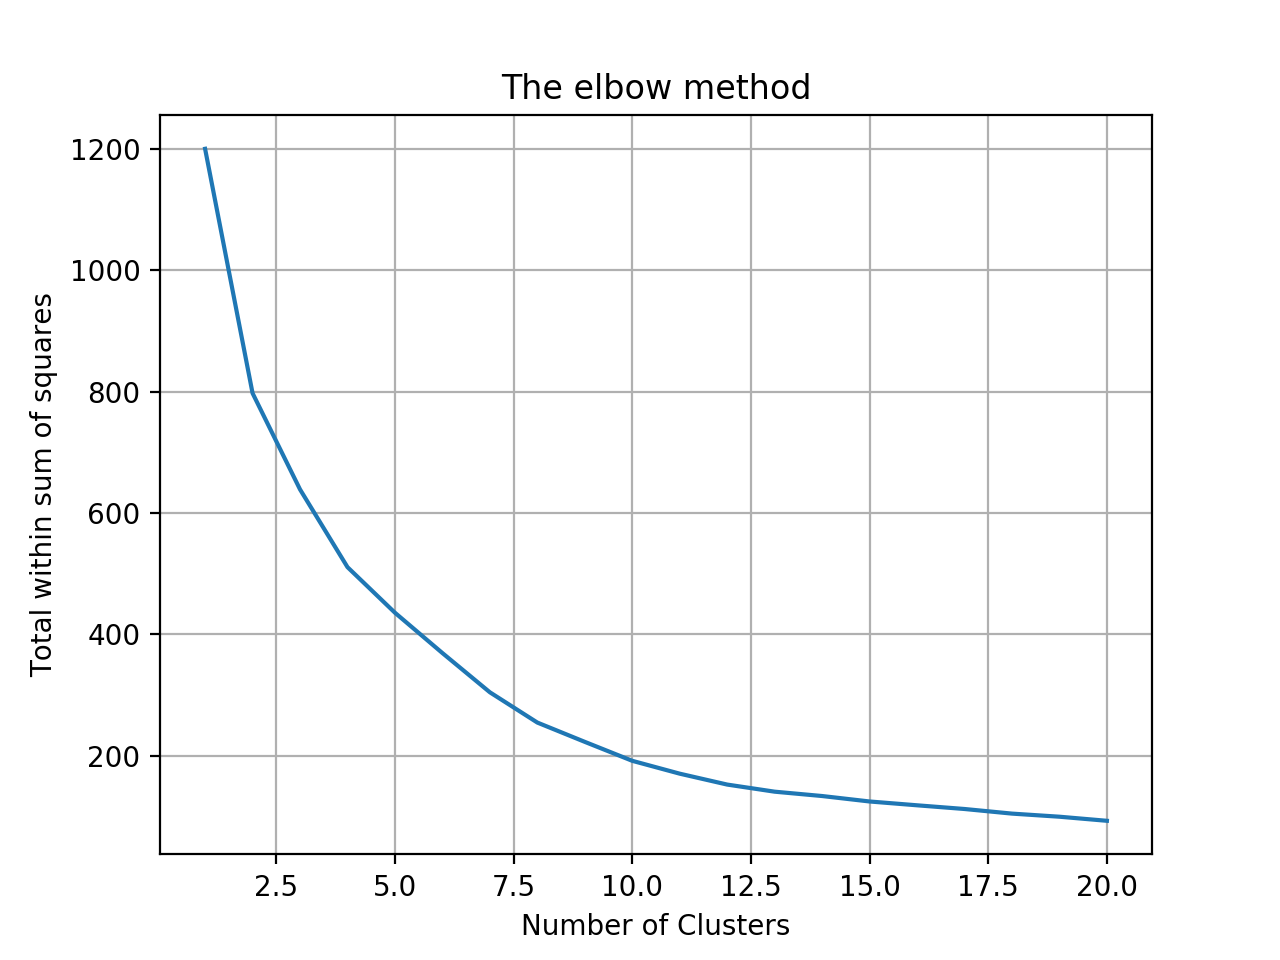

In [156]:
plt.figure()
plt.plot(list(wss.keys()),list(wss.values()))
plt.grid()
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within sum of squares')
plt.show()

In [150]:
##Second using Silhouette score to select best K 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm 

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


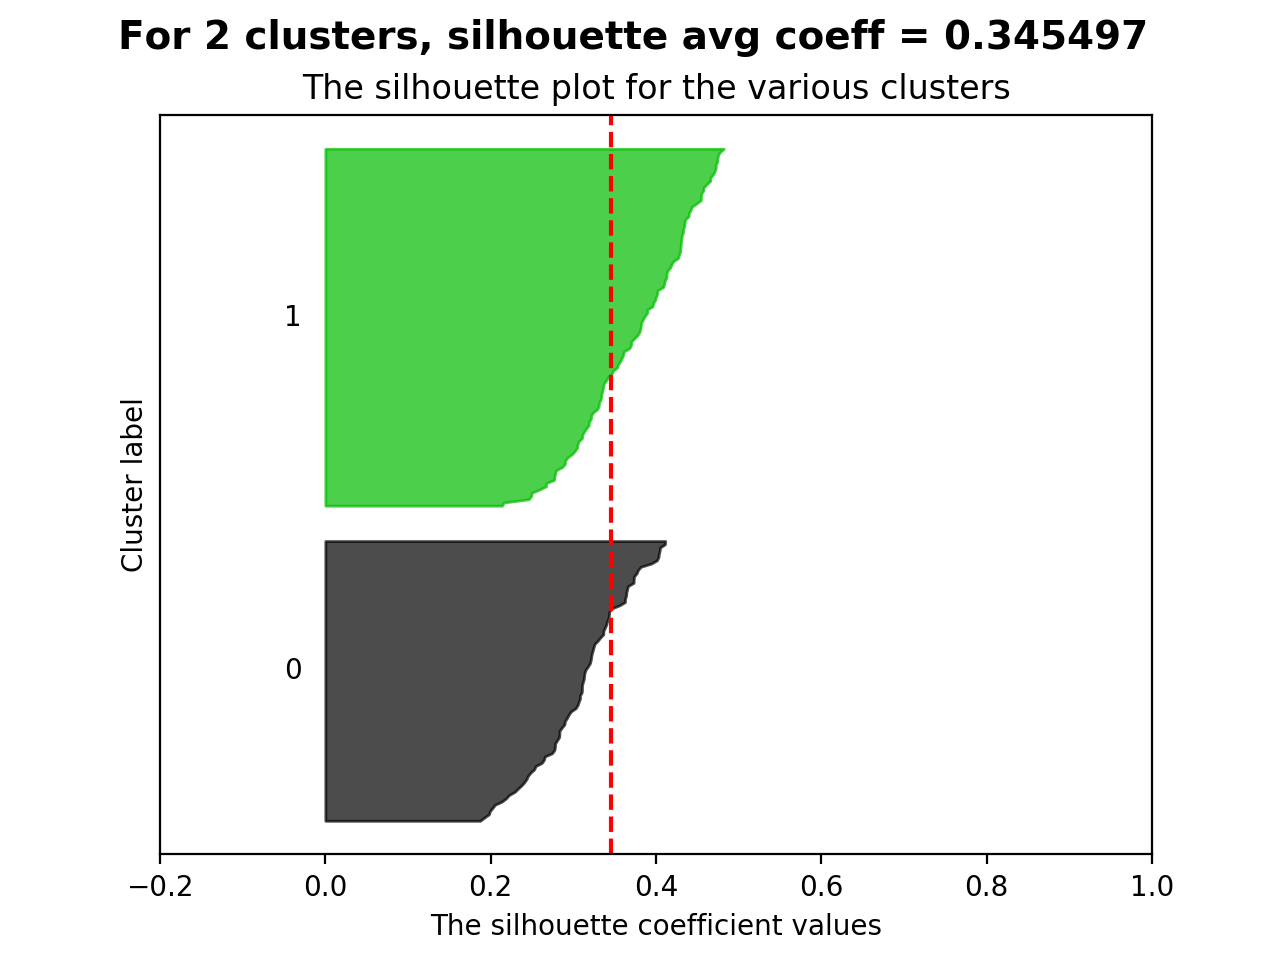

<IPython.core.display.Javascript object>


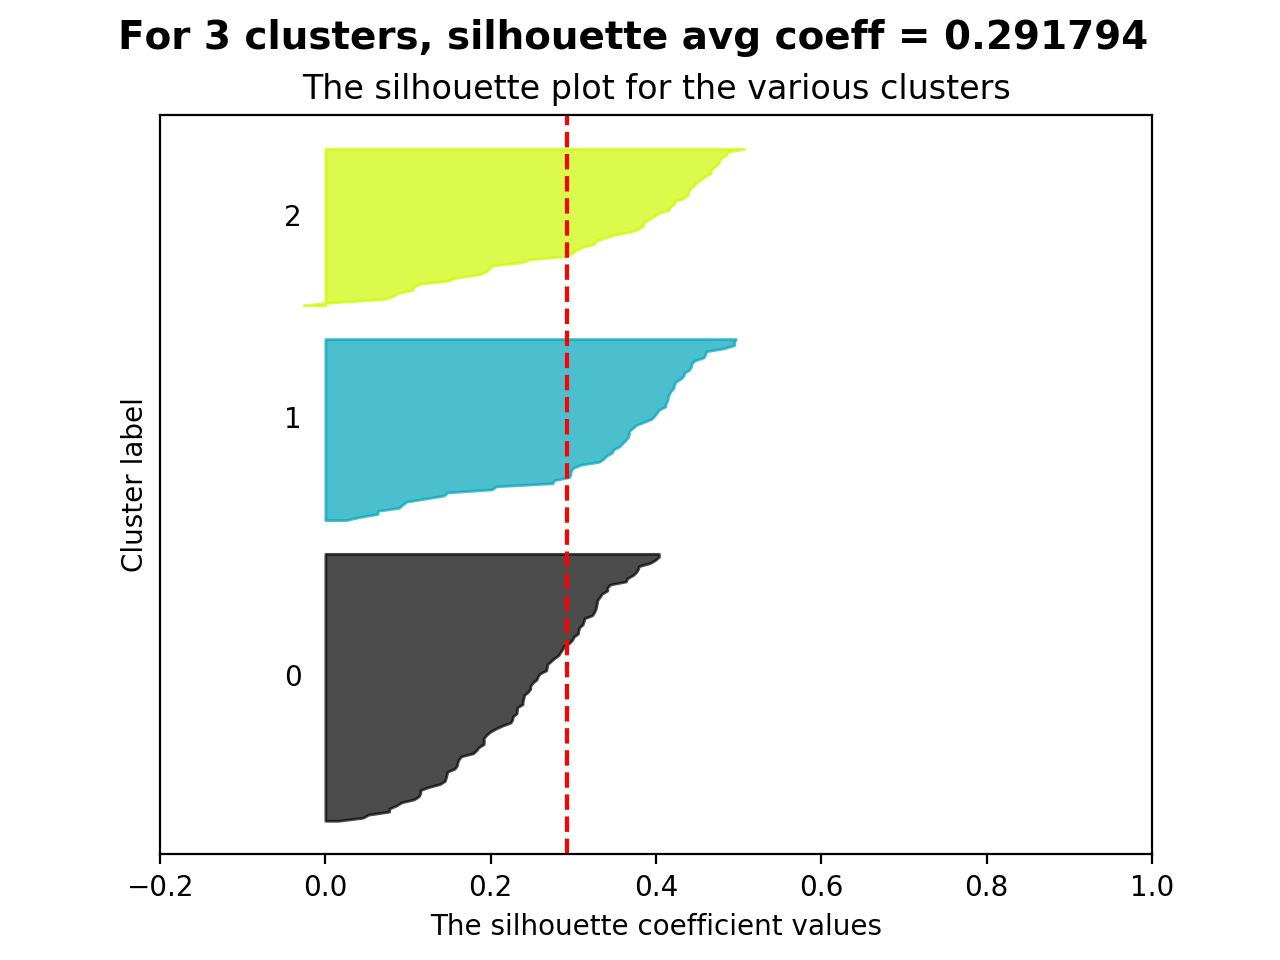

<IPython.core.display.Javascript object>


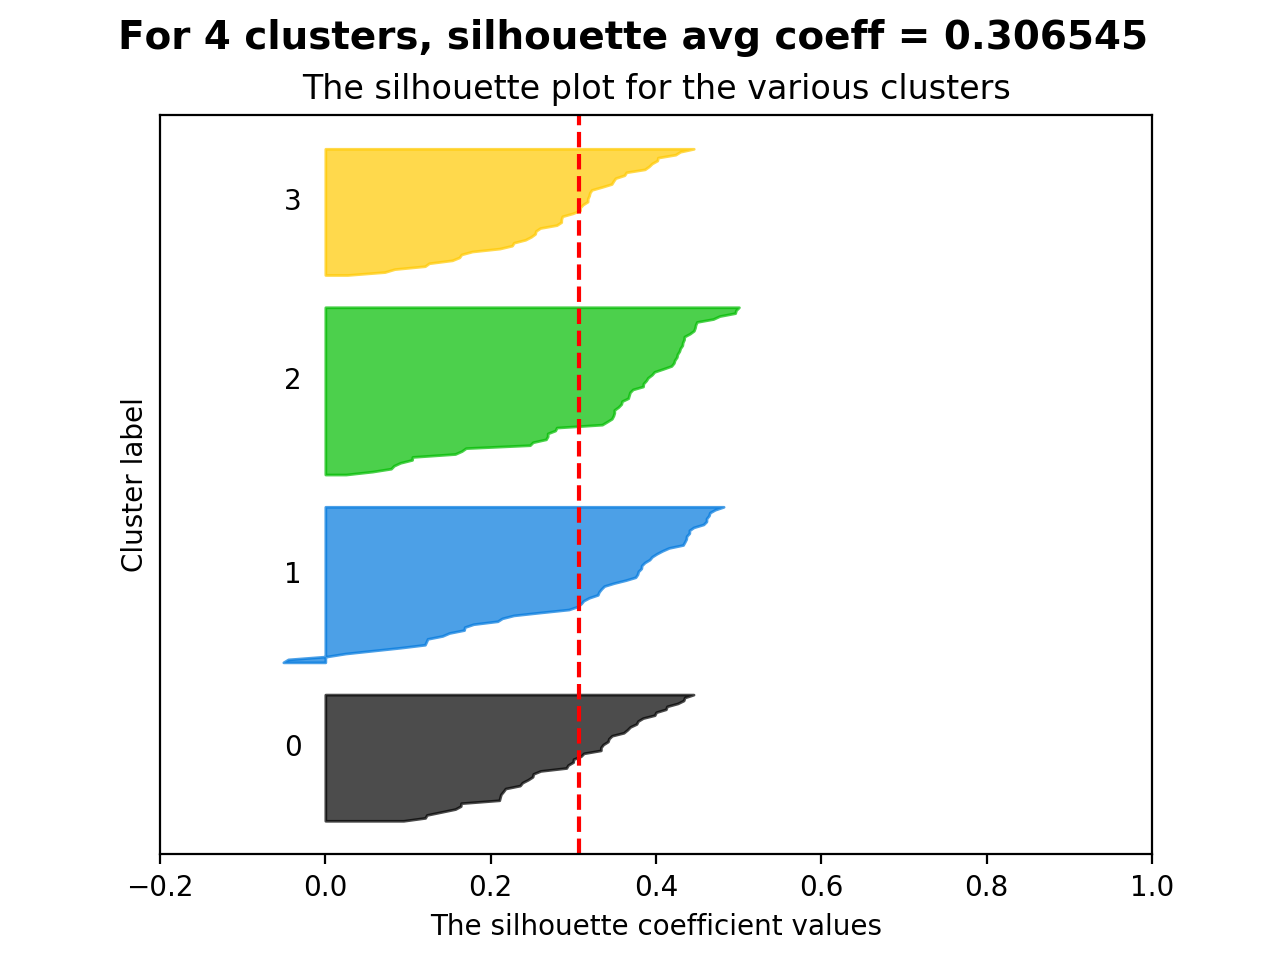

<IPython.core.display.Javascript object>


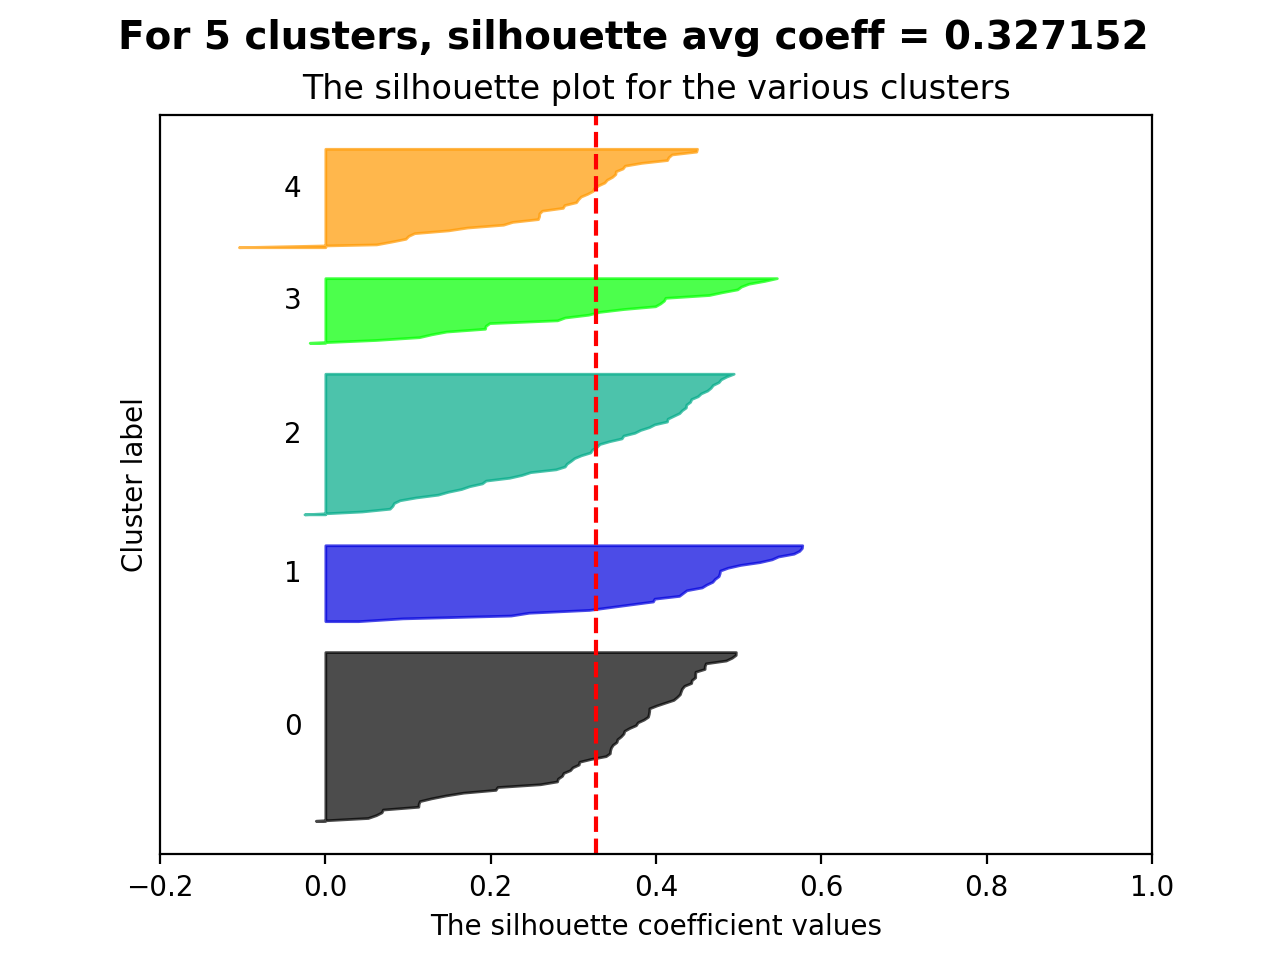

<IPython.core.display.Javascript object>


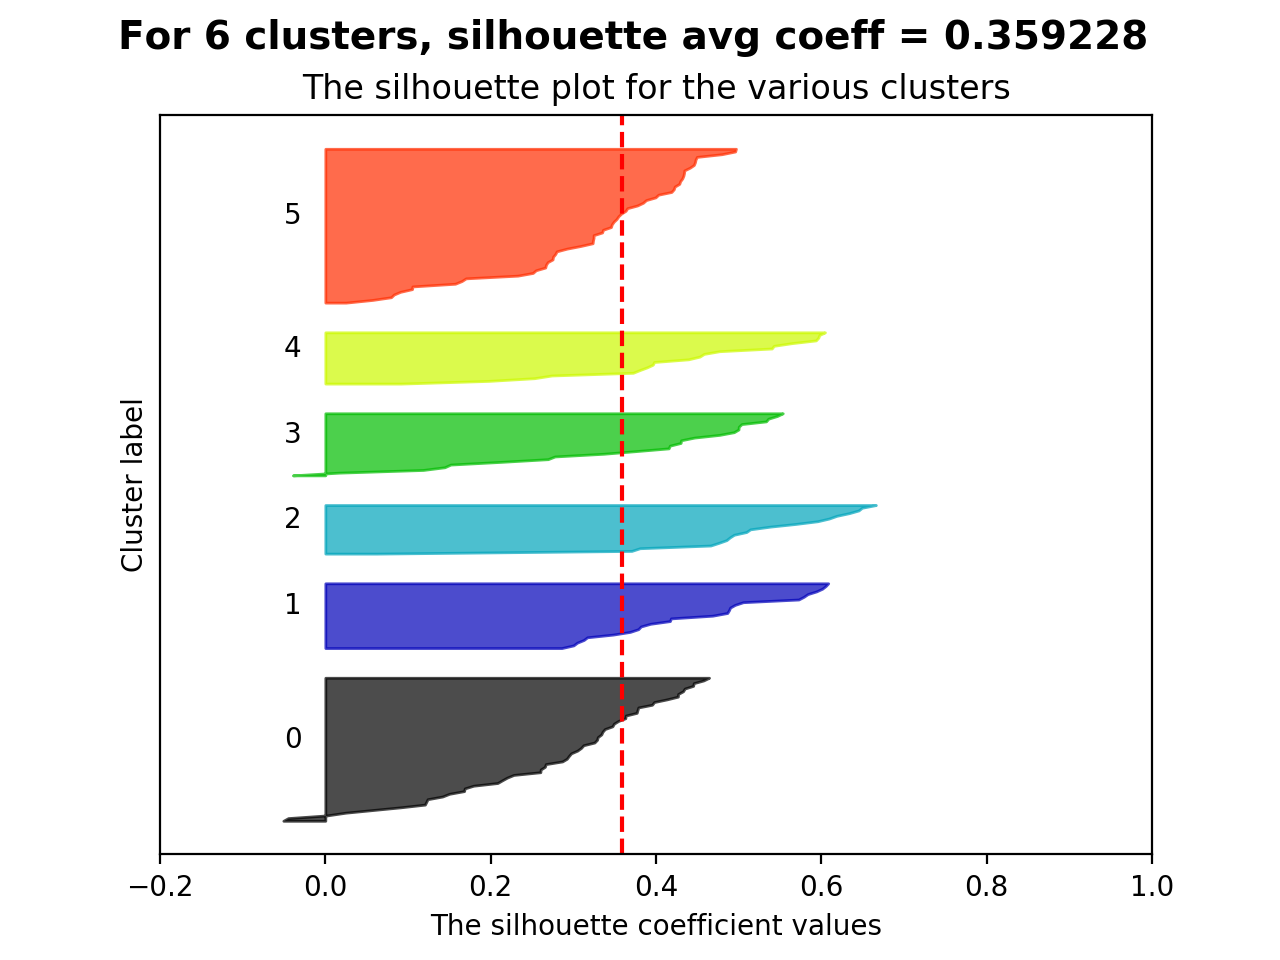

<IPython.core.display.Javascript object>


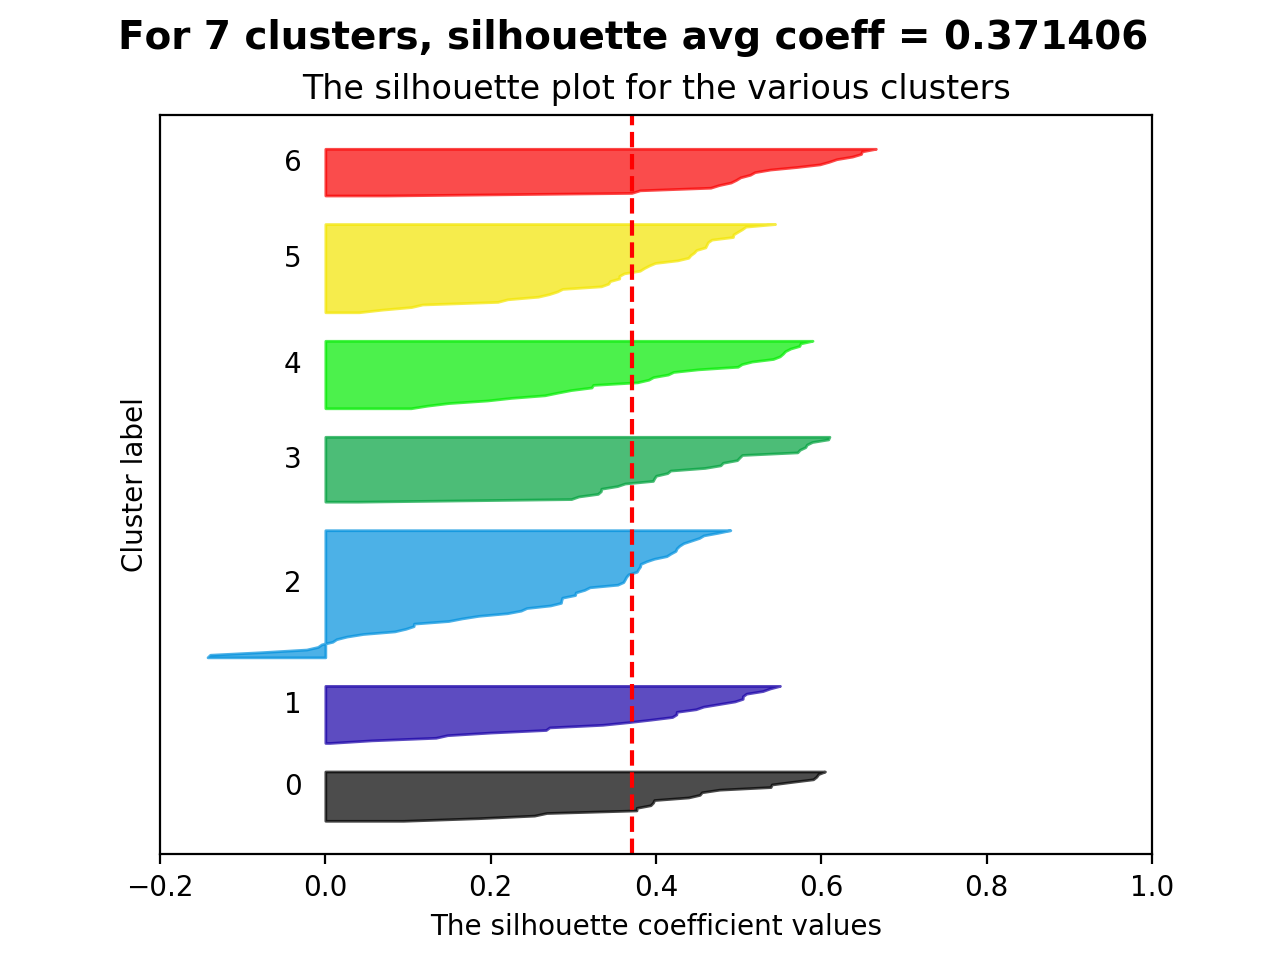

<IPython.core.display.Javascript object>


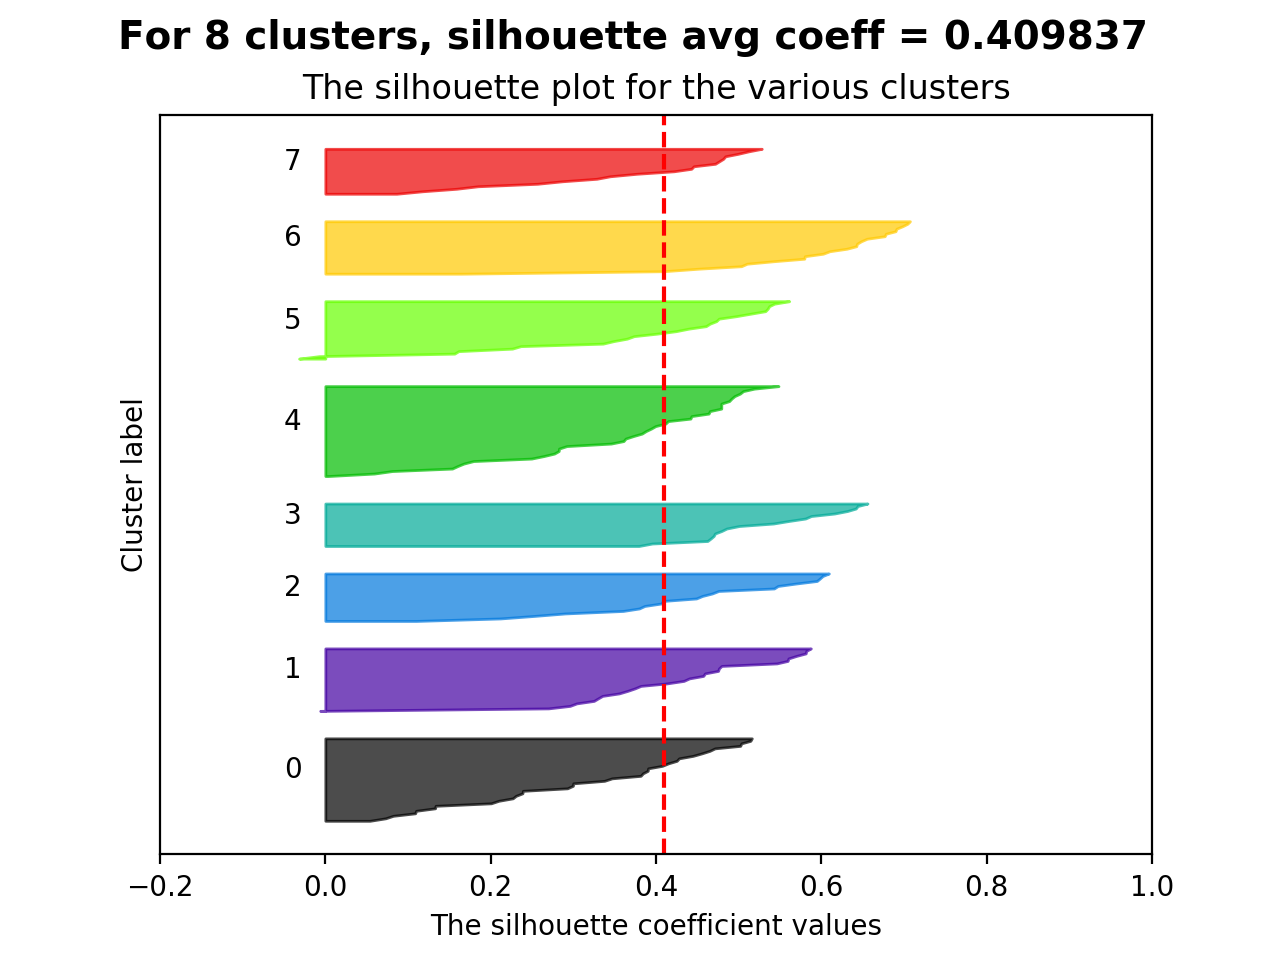

<IPython.core.display.Javascript object>


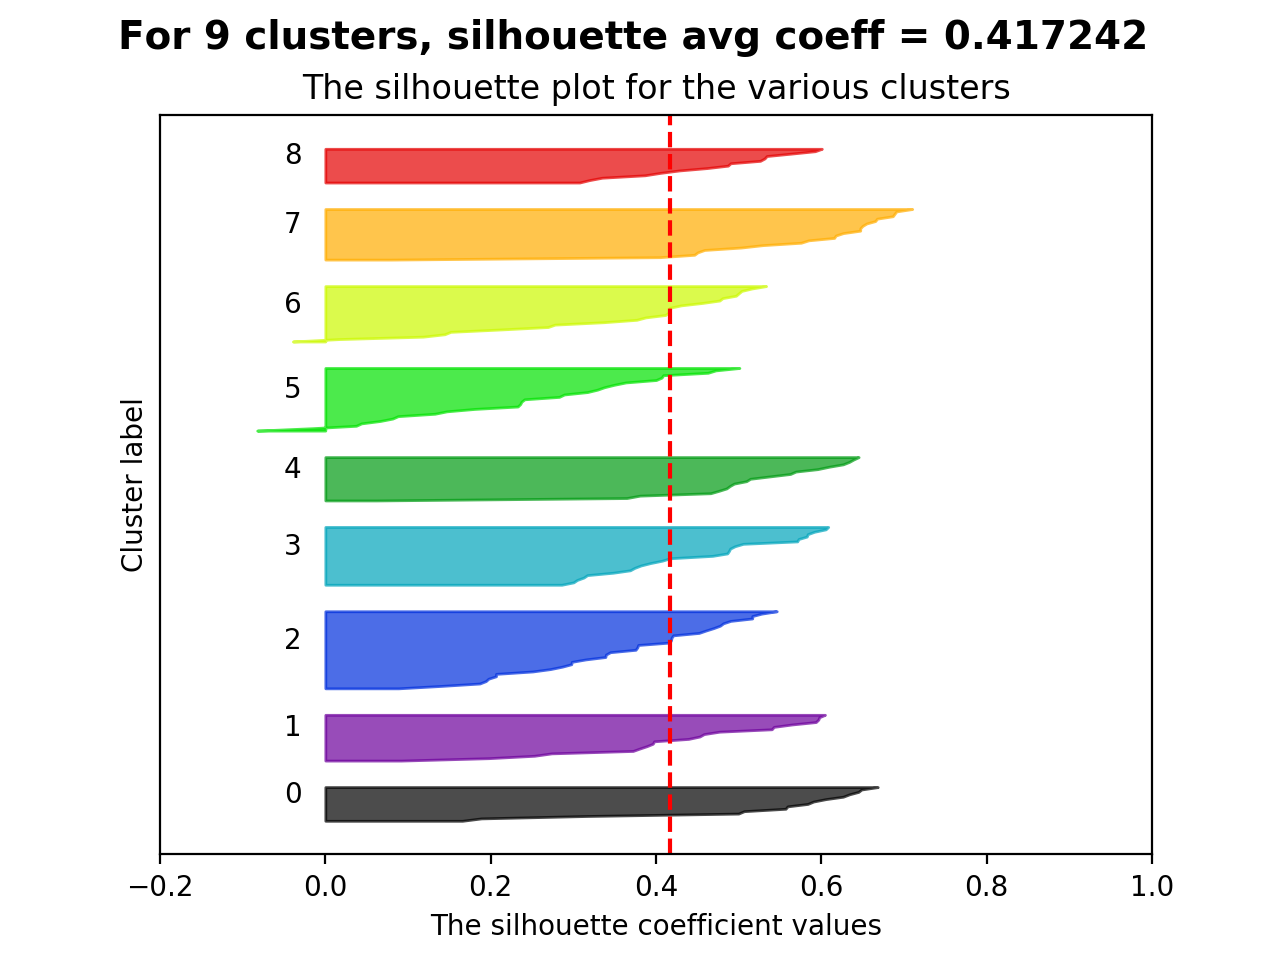

<IPython.core.display.Javascript object>


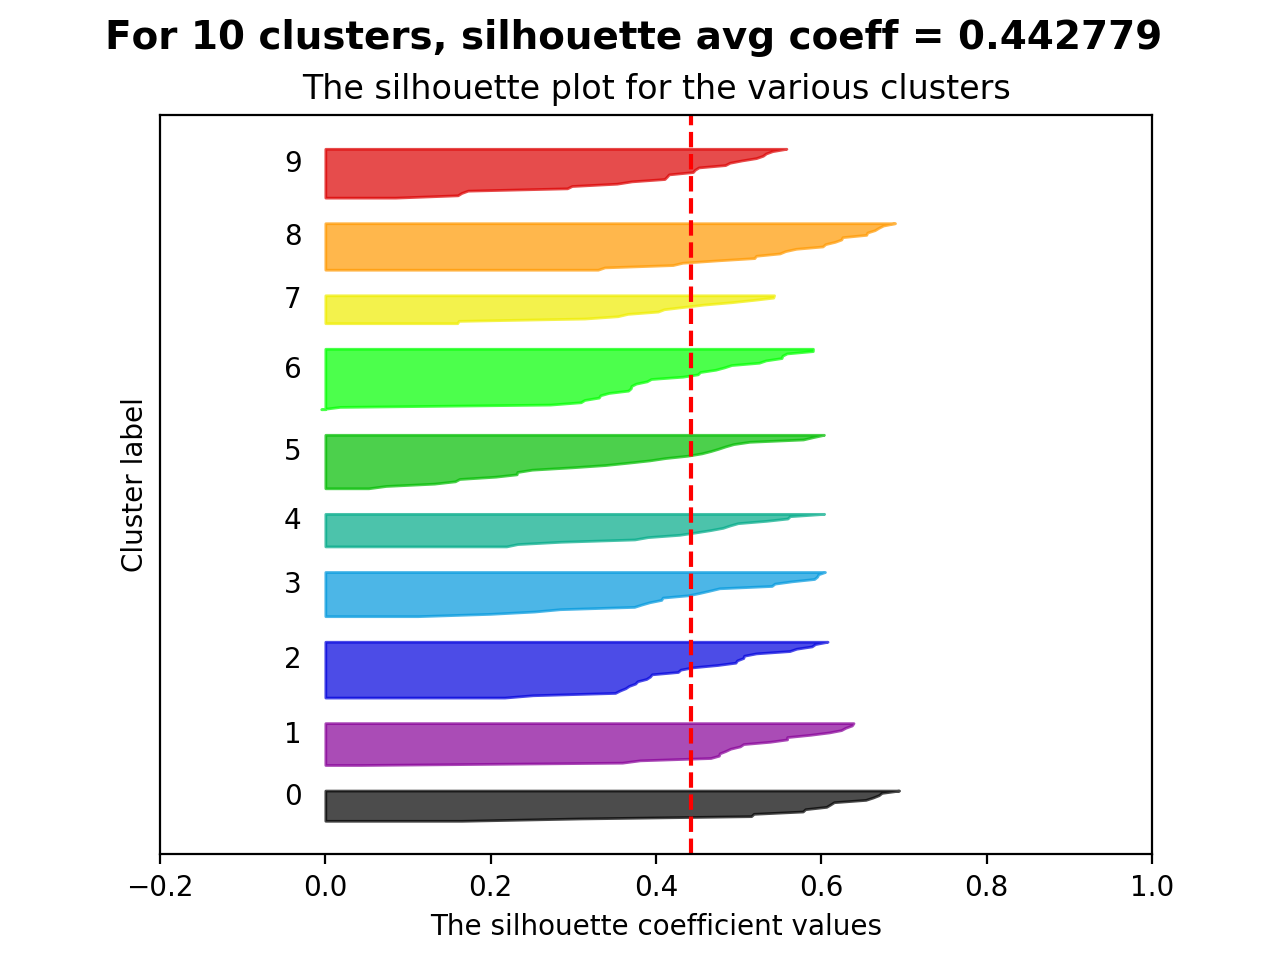

<IPython.core.display.Javascript object>


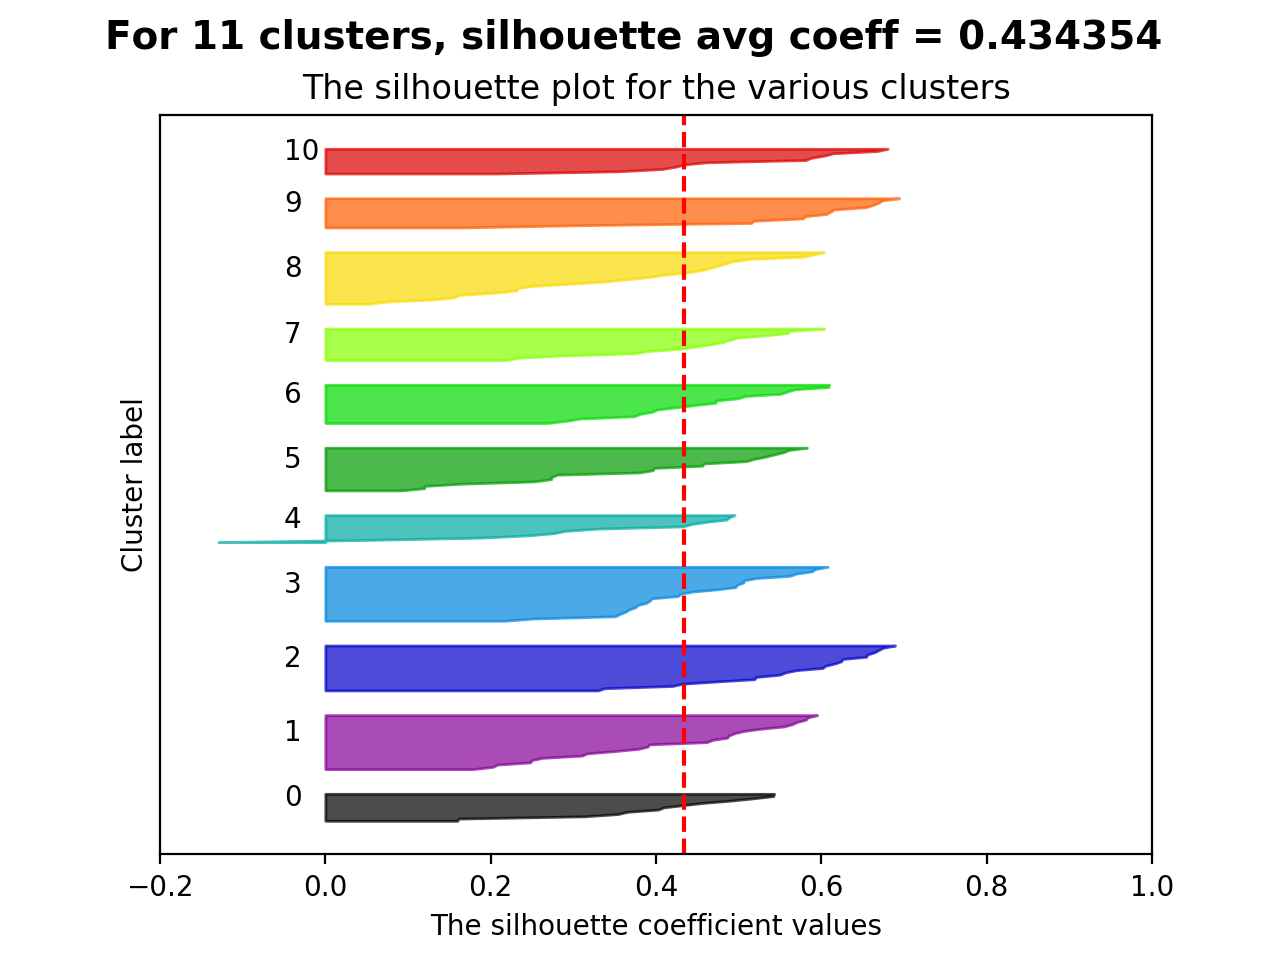

<IPython.core.display.Javascript object>


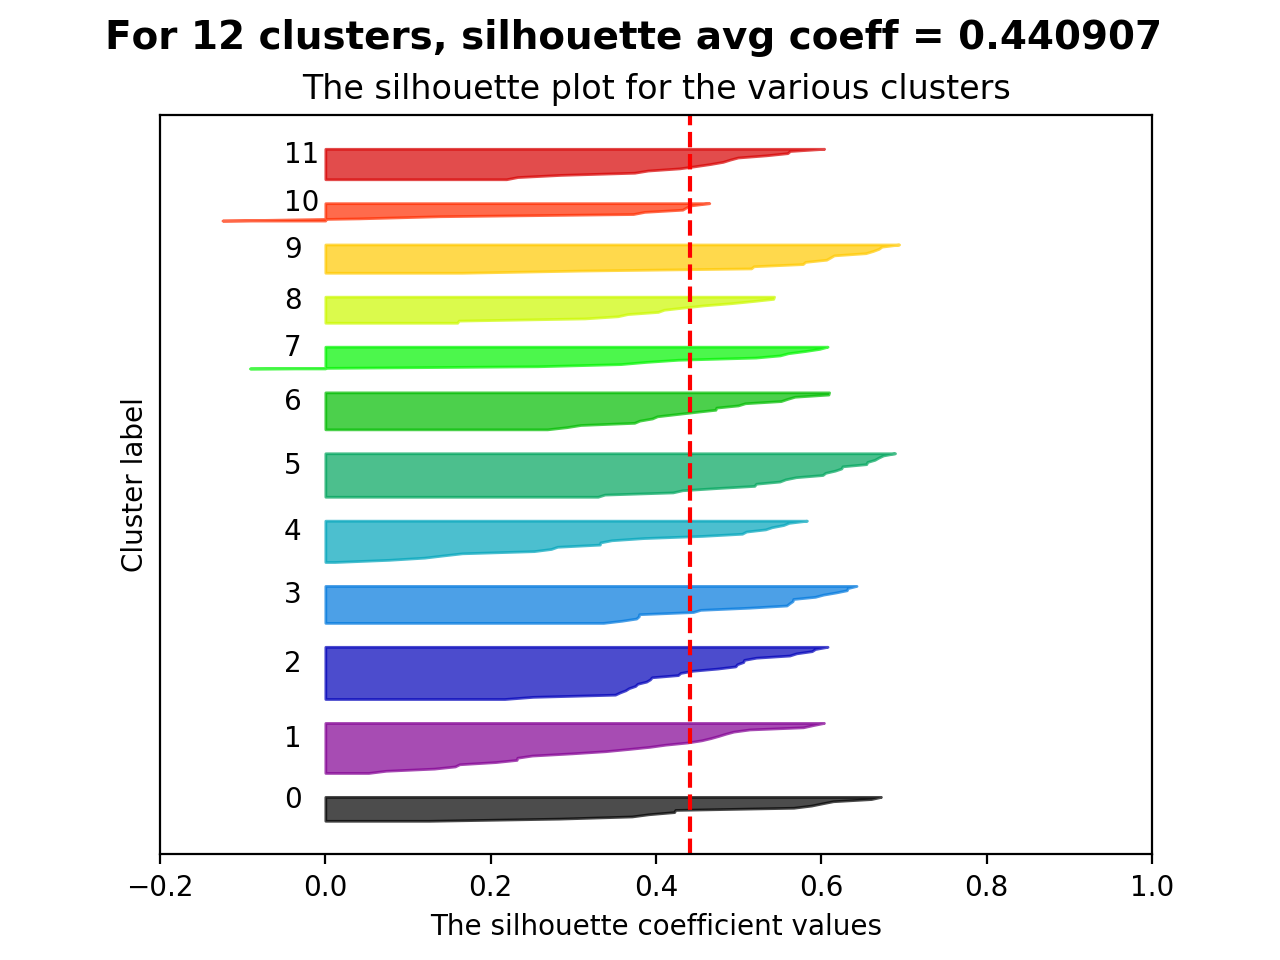

<IPython.core.display.Javascript object>


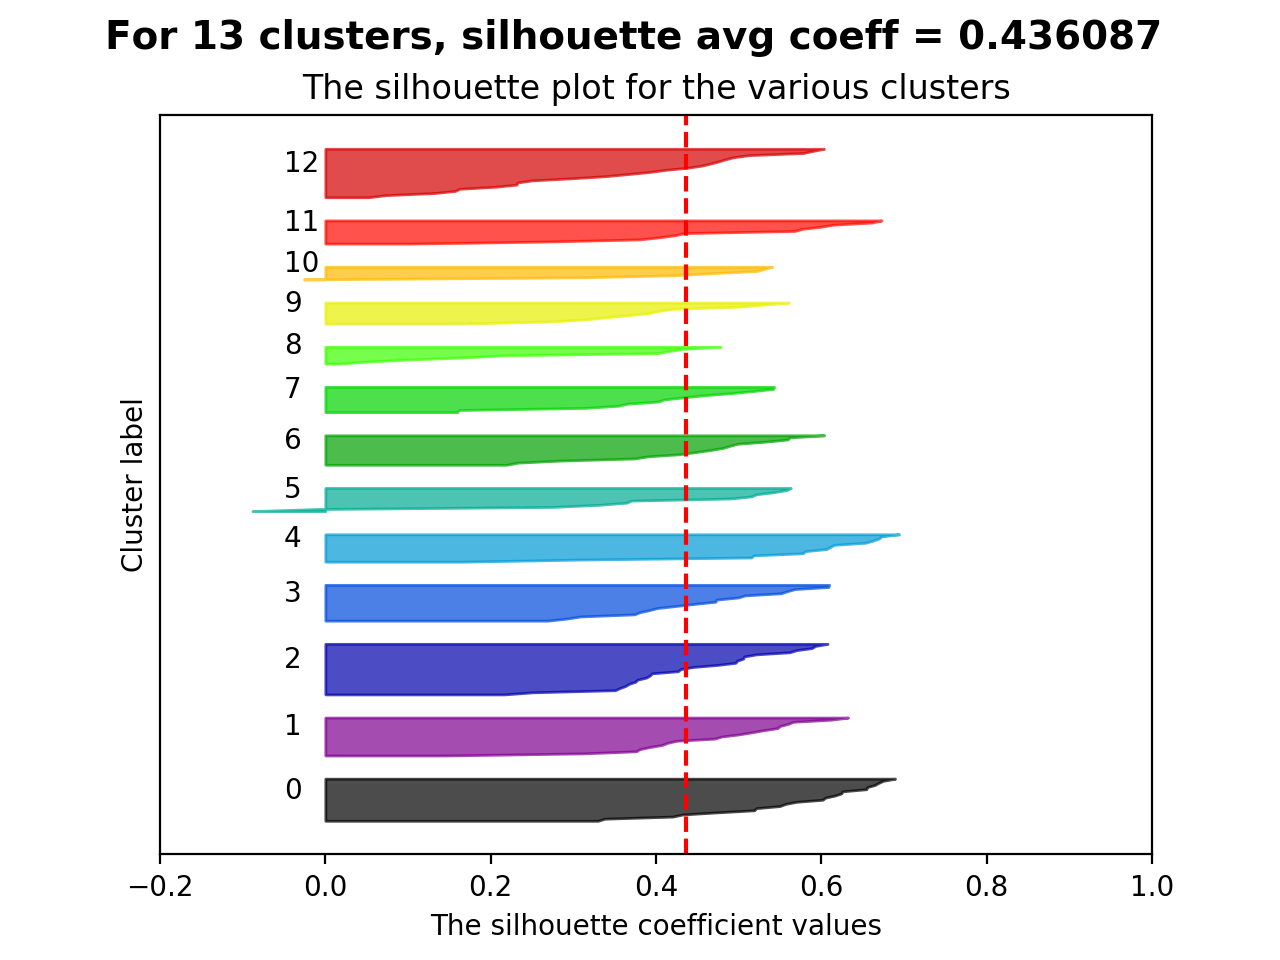

<IPython.core.display.Javascript object>


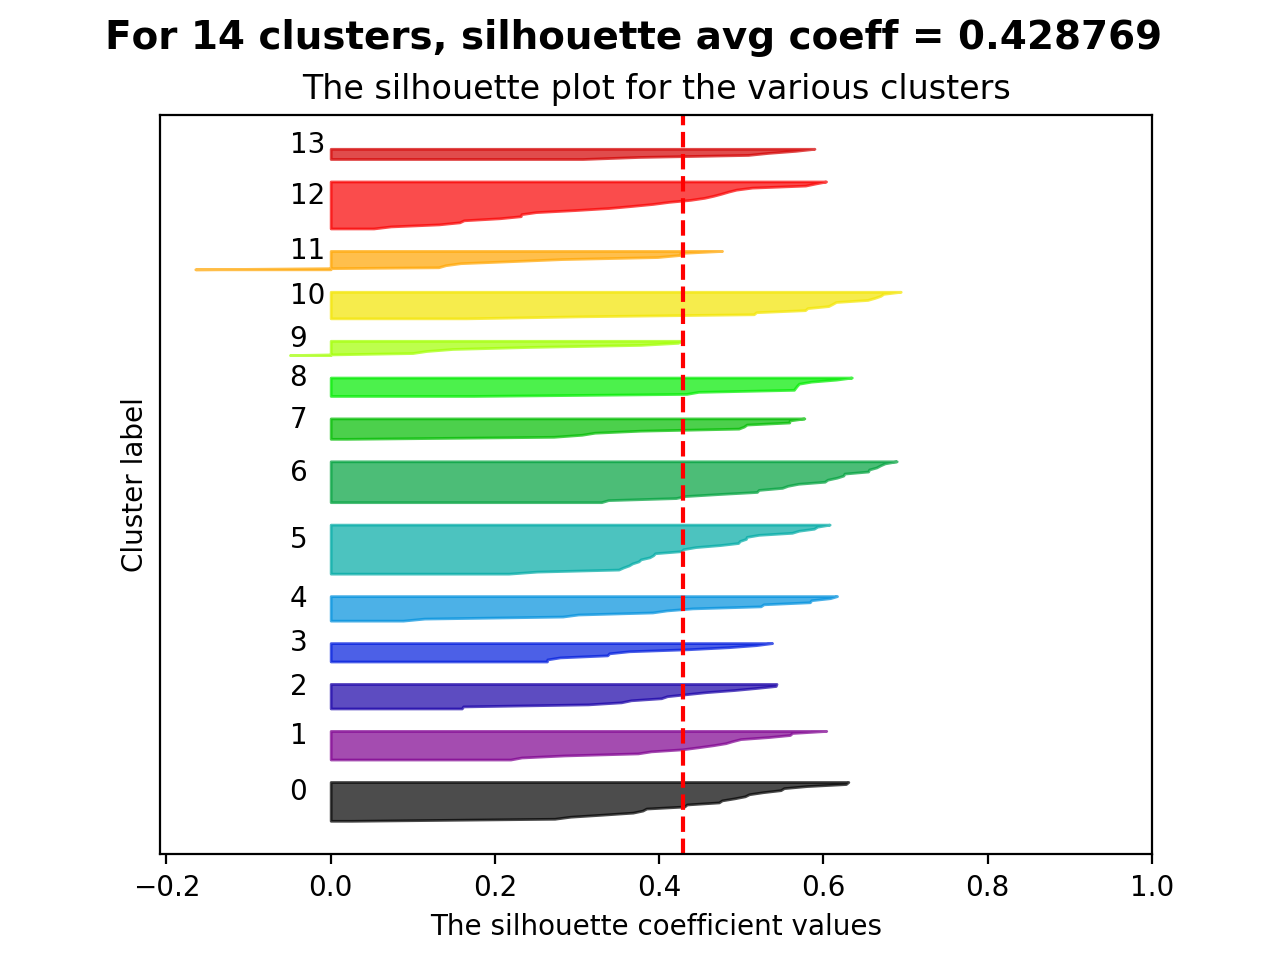

<IPython.core.display.Javascript object>


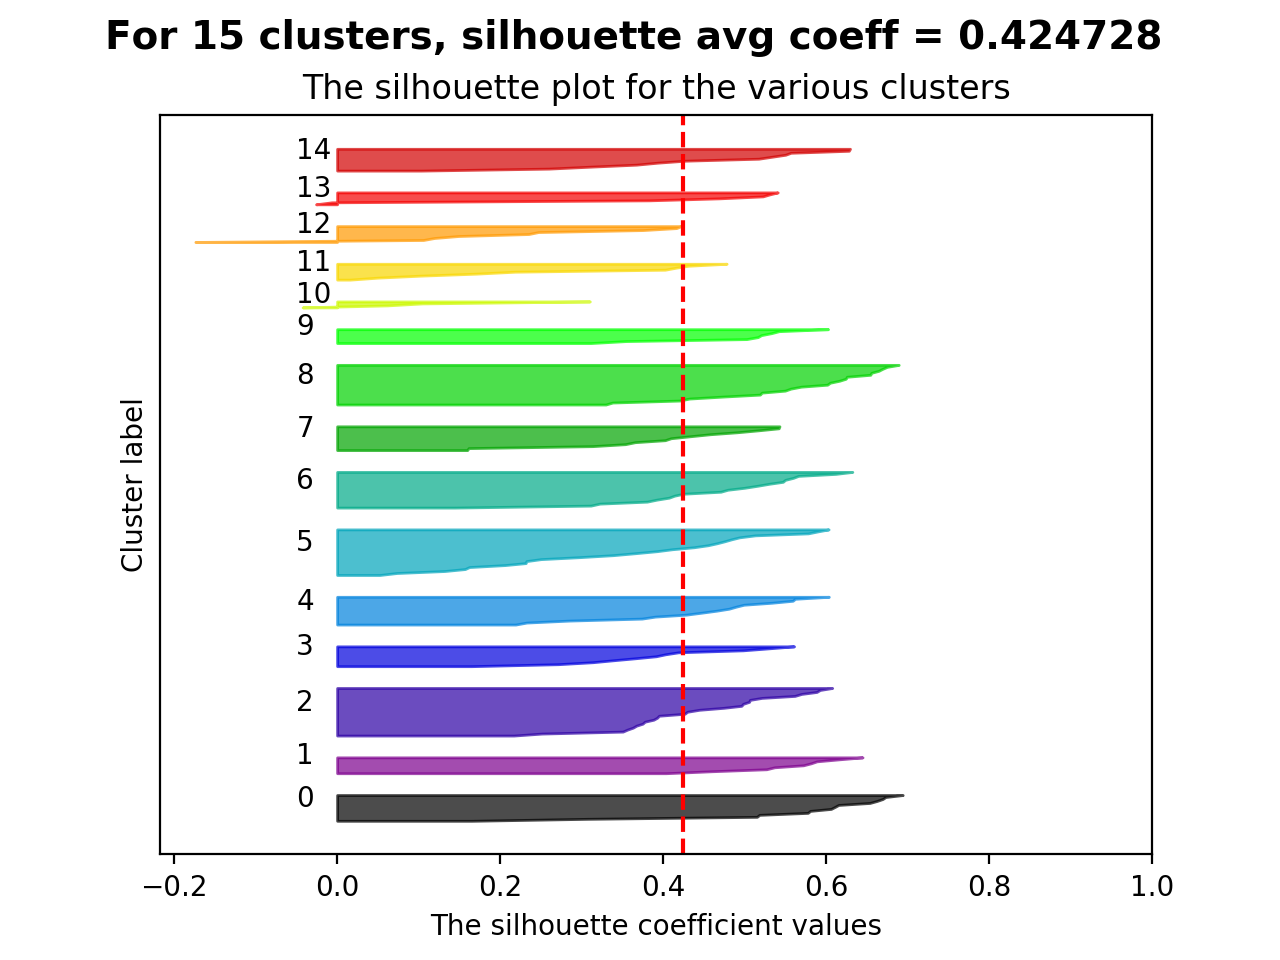

In [157]:
X_matrix = stdata.as_matrix()

range_n_clusters = [2,3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

In [60]:
data.head(2)  ##After running with dummified gender we're down to 10 clusters

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81


In [158]:
ID = data['CustomerID']
ID.head(2)

0    1
1    2
Name: CustomerID, dtype: int64

In [159]:
bestk = KMeans(n_clusters=10,random_state=1234)
best_means=bestk.fit_predict(stdata)

In [160]:
results=pd.DataFrame({'CustomerID':ID,'Clusters':best_means})
#results.head()

In [162]:
##Merging with initial data
info = pd.read_csv('/Users/mac/Desktop/Supermarket Work/Mall_Customers.csv', header='infer', index_col=0)
final = pd.merge(info,results,on='CustomerID')
#info.head(2)
final.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,7
1,2,Male,21,15,81,7
2,3,Female,20,16,6,2
3,4,Female,23,16,77,9
4,5,Female,31,17,40,2


In [163]:
final.to_csv('MallClusters10.csv', index=None)

In [166]:
##Saving the centroids for deployment 
# inverse_transform is used to Scale back the data to the original representation
mall_centroids = pd.DataFrame(standardizer.inverse_transform(bestk.cluster_centers_),columns=stdata.columns)   ## Using inverse_transform to retrive actual values from standardized data
mall_centroids.to_csv("best_mall_cluster_centroids10.csv")
#mall_centroids

In [167]:
mall_centroids

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,163.333333,32.190476,86.047619,81.666667,1.0,-1.110223e-16
1,158.368421,32.947368,86.052632,81.263158,0.0,1.000000e+00
2,23.461538,41.538462,26.538462,20.692308,1.0,-1.110223e-16
3,69.692308,58.115385,48.038462,41.269231,0.0,1.000000e+00
4,94.416667,27.833333,58.125000,46.541667,1.0,0.000000e+00
5,159.500000,39.500000,85.150000,14.050000,0.0,1.000000e+00
6,80.840000,54.080000,53.240000,49.520000,1.0,0.000000e+00
7,50.521739,25.043478,38.652174,59.608696,0.0,1.000000e+00
8,171.000000,44.600000,92.333333,21.600000,1.0,-1.665335e-16
9,24.285714,25.857143,26.642857,79.142857,1.0,-1.110223e-16


In [168]:
final.Clusters.value_counts()

3    26
6    25
4    24
7    23
0    21
5    20
1    19
8    15
9    14
2    13
Name: Clusters, dtype: int64

In [ ]:
#analysis = final.groupby(['Clusters']).mean().reset_index()
#analysis

In [ ]:
#Assuming we need to perform Agglomerative Clustering 

<IPython.core.display.Javascript object>


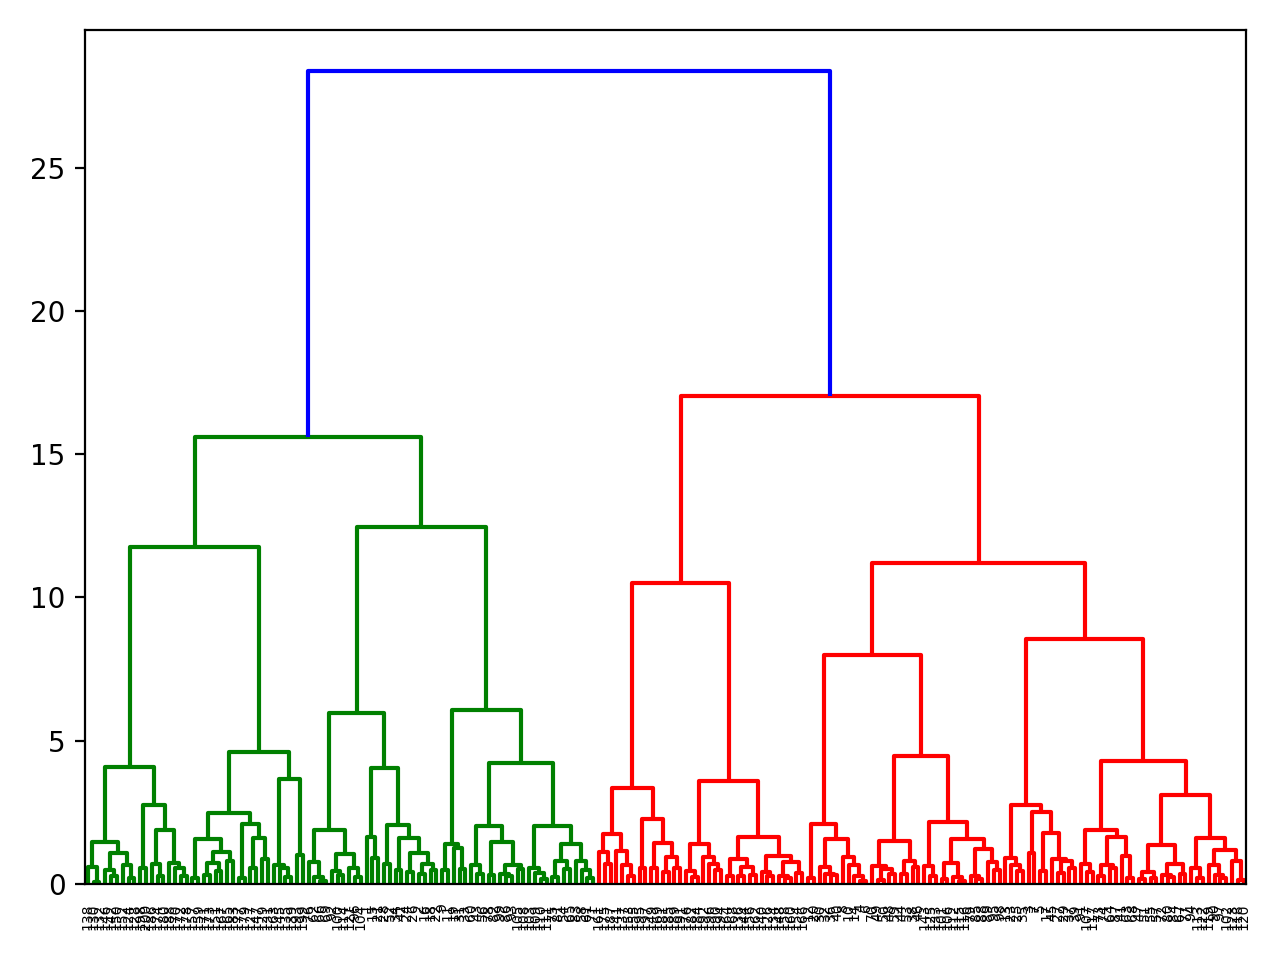

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [169]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Preparing linkage matrix
linkage_matrix = linkage(stdata, method='ward',metric='euclidean')


fig, axs = plt.subplots()
dendrogram(linkage_matrix,labels=ID.as_matrix())
plt.tight_layout()
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

## Training model and return class labels
agg_clusters = agg_clust.fit_predict(stdata)

## Label - Cluster
agg_result = pd.DataFrame({"CustomerID":ID,"agg_cluster":agg_clusters}).sort_values('agg_cluster')

In [105]:
agg_result.head(3)

,CustomerID,agg_cluster
71,72,0
90,91,0
89,90,0


In [101]:
agg_result.agg_cluster.value_counts()

0    52
3    39
1    35
2    30
5    22
4    22
Name: agg_cluster, dtype: int64

In [109]:
### redo the process with Gender variable but view in tableau shows no need 
### Agglomerative has gender but doesn't change a thing 
Aggdone.to_csv('Aggdone.csv', index=None)

In [107]:
info = pd.read_csv('/Users/mac/Desktop/Supermarket Work/Mall_Customers.csv', header='infer', index_col=0)
Aggdone = pd.merge(info,agg_result,on='CustomerID')
#info.head(2)

In [108]:
Aggdone.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),agg_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
